In [60]:
#Read Data
import pandas as pd
Data = pd.read_csv('dictionary.csv')
Data

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL
...,...,...,...,...
3230,72,153,Yauco Municipio,PR
3231,74,300,Midway Islands,UM
3232,78,10,St. Croix Island,VI
3233,78,20,St. John Island,VI


In [62]:
#Remove Data Records With Empty Values
Data = Data.dropna()
Data

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
0,1,1,Autauga County,AL
1,1,3,Baldwin County,AL
2,1,5,Barbour County,AL
3,1,7,Bibb County,AL
4,1,9,Blount County,AL
...,...,...,...,...
3230,72,153,Yauco Municipio,PR
3231,74,300,Midway Islands,UM
3232,78,10,St. Croix Island,VI
3233,78,20,St. John Island,VI


In [66]:
#Filtering Out Data with County_Code No Less Than 100
Data1 = Data[Data.COUNTY_CODE >= 100]
Data1

,STATE_CODE,COUNTY_CODE,COUNTY,STATE
50,1,101,Montgomery County,AL
51,1,103,Morgan County,AL
52,1,105,Perry County,AL
53,1,107,Pickens County,AL
54,1,109,Pike County,AL
...,...,...,...,...
3227,72,147,Vieques Municipio,PR
3228,72,149,Villalba Municipio,PR
3229,72,151,Yabucoa Municipio,PR
3230,72,153,Yauco Municipio,PR


In [68]:
#Statistical Analysis
DF = pd.DataFrame(Data)
DF.describe()

,STATE_CODE,COUNTY_CODE
count,3235.000000,3235.000000
mean,31.455023,102.931066
std,16.425750,106.868459
min,1.000000,1.000000
25%,19.000000,35.000000
50%,30.000000,79.000000
75%,46.000000,133.000000
max,78.000000,840.000000


In [70]:
#Correlation Calculation
Correlation = Data['COUNTY_CODE'].corr(Data['STATE_CODE'])
Correlation

0.1320228274576776

In [72]:
#One-Hot Encoding for County Categorical Variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Data['County_encoded'] = encoder.fit_transform(Data['COUNTY'])
Data

,STATE_CODE,COUNTY_CODE,COUNTY,STATE,County_encoded
0,1,1,Autauga County,AL,90
1,1,3,Baldwin County,AL,97
2,1,5,Barbour County,AL,108
3,1,7,Bibb County,AL,161
4,1,9,Blount County,AL,176
...,...,...,...,...,...
3230,72,153,Yauco Municipio,PR,1953
3231,74,300,Midway Islands,UM,1162
3232,78,10,St. Croix Island,VI,1649
3233,78,20,St. John Island,VI,1654


In [74]:
#One-Hot Encoding for STATE Categorical Variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Data['State_encoded'] = encoder.fit_transform(Data['STATE'])
Data

,STATE_CODE,COUNTY_CODE,COUNTY,STATE,County_encoded,State_encoded
0,1,1,Autauga County,AL,90,1
1,1,3,Baldwin County,AL,97,1
2,1,5,Barbour County,AL,108,1
3,1,7,Bibb County,AL,161,1
4,1,9,Blount County,AL,176,1
...,...,...,...,...,...,...
3230,72,153,Yauco Municipio,PR,1953,42
3231,74,300,Midway Islands,UM,1162,48
3232,78,10,St. Croix Island,VI,1649,51
3233,78,20,St. John Island,VI,1654,51


In [76]:
#Data Normalisation
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

DF = pd.DataFrame(Data)
cols = ['STATE_CODE', 'COUNTY_CODE']
DF = DF.loc[:, cols]

Scaler = MinMaxScaler()
DF_Normalised = pd.DataFrame(Scaler.fit_transform(DF), columns = DF.columns)
DF_Normalised

,STATE_CODE,COUNTY_CODE
0,0.000000,0.000000
1,0.000000,0.002384
2,0.000000,0.004768
3,0.000000,0.007151
4,0.000000,0.009535
...,...,...
3230,0.922078,0.181168
3231,0.948052,0.356377
3232,1.000000,0.010727
3233,1.000000,0.022646


In [78]:
#Preparing Training/Testing Data
County_Code = DF['COUNTY_CODE'].values.reshape(-1, 1)
State_Code = DF['STATE_CODE'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
State_Code_Train, State_Code_Test, County_Code_Train, County_Code_Test = train_test_split(State_Code, County_Code, test_size = 0.3)

In [80]:
State_Code_Train

array([[48],
       [ 1],
       [ 1],
       ...,
       [20],
       [20],
       [44]])

In [82]:
State_Code_Test

array([[21],
       [19],
       [23],
       [22],
       [ 8],
       [29],
       [45],
       [28],
       [12],
       [20],
       [51],
       [31],
       [18],
       [17],
       [47],
       [53],
       [20],
       [21],
       [48],
       [42],
       [21],
       [38],
       [ 6],
       [56],
       [21],
       [ 8],
       [ 6],
       [42],
       [31],
       [22],
       [27],
       [54],
       [ 1],
       [55],
       [ 8],
       [35],
       [13],
       [48],
       [13],
       [ 2],
       [ 5],
       [38],
       [39],
       [40],
       [27],
       [ 2],
       [25],
       [21],
       [ 5],
       [29],
       [34],
       [16],
       [22],
       [46],
       [13],
       [55],
       [33],
       [21],
       [39],
       [20],
       [72],
       [39],
       [24],
       [47],
       [ 8],
       [21],
       [46],
       [31],
       [ 5],
       [ 1],
       [38],
       [54],
       [78],
       [47],
       [19],
       [13],
       [ 2],

In [84]:
County_Code_Train

array([[345],
       [ 37],
       [  5],
       ...,
       [137],
       [103],
       [  9]])

In [86]:
County_Code_Test

array([[129],
       [133],
       [  5],
       [ 51],
       [ 27],
       [179],
       [ 13],
       [ 55],
       [ 15],
       [ 93],
       [199],
       [131],
       [ 95],
       [171],
       [165],
       [ 41],
       [ 35],
       [149],
       [155],
       [  7],
       [209],
       [ 95],
       [ 17],
       [ 13],
       [ 83],
       [ 61],
       [107],
       [131],
       [  1],
       [ 19],
       [ 79],
       [  1],
       [ 63],
       [ 87],
       [ 45],
       [ 55],
       [ 89],
       [157],
       [219],
       [240],
       [ 43],
       [ 67],
       [127],
       [ 45],
       [ 47],
       [ 60],
       [ 13],
       [159],
       [ 83],
       [169],
       [ 25],
       [ 25],
       [ 73],
       [ 15],
       [139],
       [135],
       [ 19],
       [103],
       [ 37],
       [ 21],
       [139],
       [ 79],
       [  9],
       [171],
       [  1],
       [187],
       [111],
       [ 21],
       [ 27],
       [ 85],
       [ 59],
      

In [88]:
#Model Training and Testing
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(State_Code_Train, County_Code_Train)
County_Code_Pred = Regressor.predict(State_Code_Test)

In [90]:
County_Code_Pred

array([[ 93.13161166],
       [ 91.1764838 ],
       [ 95.08673952],
       [ 94.10917559],
       [ 80.42328058],
       [100.9521231 ],
       [116.59314597],
       [ 99.97455917],
       [ 84.3335363 ],
       [ 92.15404773],
       [122.45852954],
       [102.90725096],
       [ 90.19891987],
       [ 89.22135594],
       [118.54827383],
       [124.4136574 ],
       [ 92.15404773],
       [ 93.13161166],
       [119.52583776],
       [113.66045418],
       [ 93.13161166],
       [109.75019846],
       [ 78.46815272],
       [127.34634919],
       [ 93.13161166],
       [ 80.42328058],
       [ 78.46815272],
       [113.66045418],
       [102.90725096],
       [ 94.10917559],
       [ 98.99699524],
       [125.39122133],
       [ 73.58033307],
       [126.36878526],
       [ 80.42328058],
       [106.81750667],
       [ 85.31110023],
       [119.52583776],
       [ 85.31110023],
       [ 74.557897  ],
       [ 77.49058879],
       [109.75019846],
       [110.72776239],
       [111

In [92]:
County_Code_Test

array([[129],
       [133],
       [  5],
       [ 51],
       [ 27],
       [179],
       [ 13],
       [ 55],
       [ 15],
       [ 93],
       [199],
       [131],
       [ 95],
       [171],
       [165],
       [ 41],
       [ 35],
       [149],
       [155],
       [  7],
       [209],
       [ 95],
       [ 17],
       [ 13],
       [ 83],
       [ 61],
       [107],
       [131],
       [  1],
       [ 19],
       [ 79],
       [  1],
       [ 63],
       [ 87],
       [ 45],
       [ 55],
       [ 89],
       [157],
       [219],
       [240],
       [ 43],
       [ 67],
       [127],
       [ 45],
       [ 47],
       [ 60],
       [ 13],
       [159],
       [ 83],
       [169],
       [ 25],
       [ 25],
       [ 73],
       [ 15],
       [139],
       [135],
       [ 19],
       [103],
       [ 37],
       [ 21],
       [139],
       [ 79],
       [  9],
       [171],
       [  1],
       [187],
       [111],
       [ 21],
       [ 27],
       [ 85],
       [ 59],
      

In [96]:
#Model Evaluation
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(County_Code_Test, County_Code_Pred)
MAE = mean_absolute_error(County_Code_Test, County_Code_Pred)
RMSE = np.sqrt(MSE)

In [98]:
MSE

9908.187966117517

In [100]:
MAE

69.780640974506

In [102]:
RMSE

99.53988128442548

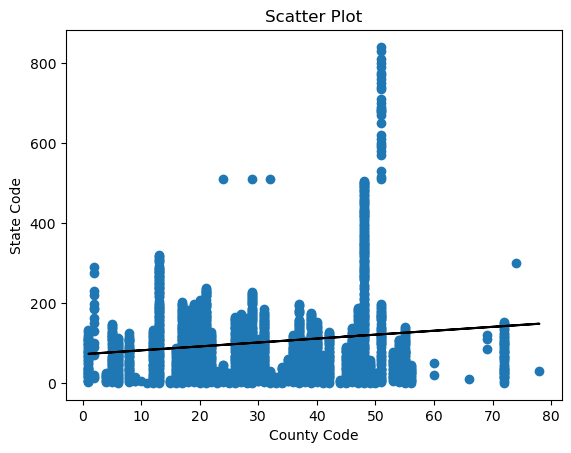

In [104]:
#Visualisation of Data Modelling
import matplotlib.pyplot as plt
plt.scatter(State_Code_Train, County_Code_Train)
plt.plot(State_Code_Train, Regressor.predict(State_Code_Train), color = 'black')
plt.xlabel('County Code')
plt.ylabel('State Code')
plt.title("Scatter Plot")
plt.show()